In [2]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('QRFINALDATA!!.csv')
df

,PIN,Sex,Region,Year,Grade,HSG,IndGrd2,AC1,AC2,SAT,IndGrd
0,N313106412255,M,Southeast Asia,ay1415,83.660000,3,91.575000,"Philosophy, Politics and Economics",Undeclared,770,1.0
1,N303108421205,M,Singapore,ay1415,82.399000,4,78.237500,Global Affairs,Psychology,680,0.0
2,N397110424273,F,Singapore,ay1415,79.126000,4,80.762500,Undecided,Philosophy,730,0.0
3,N308110412274,F,Singapore,ay1415,83.576000,3,79.225000,"Philosophy, Politics and Economics",Psychology,790,0.0
4,N337110408274,F,Singapore,ay1415,88.145000,3,89.750000,"Philosophy, Politics and Economics",Economics,800,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1235,N372120425296,M,Singapore,ay1920,85.900940,3,82.439330,Urban Studies,Environmental Studies,770,0.0
1236,N314120408278,M,Singapore,ay1920,81.917558,4,77.594090,Urban Studies,Arts & Humanities,750,0.0
1237,N371120401277,M,Singapore,ay1920,81.327281,4,79.218448,Urban Studies,Undecided,780,0.0
1238,N379120412296,M,South Asia,ay1920,83.155361,3,82.053482,Urban Studies,History,800,0.0


In [5]:
df.dtypes

PIN         object
Sex         object
Region      object
Year        object
Grade      float64
HSG          int64
IndGrd2    float64
AC1         object
AC2         object
SAT          int64
IndGrd     float64
dtype: object

In [6]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

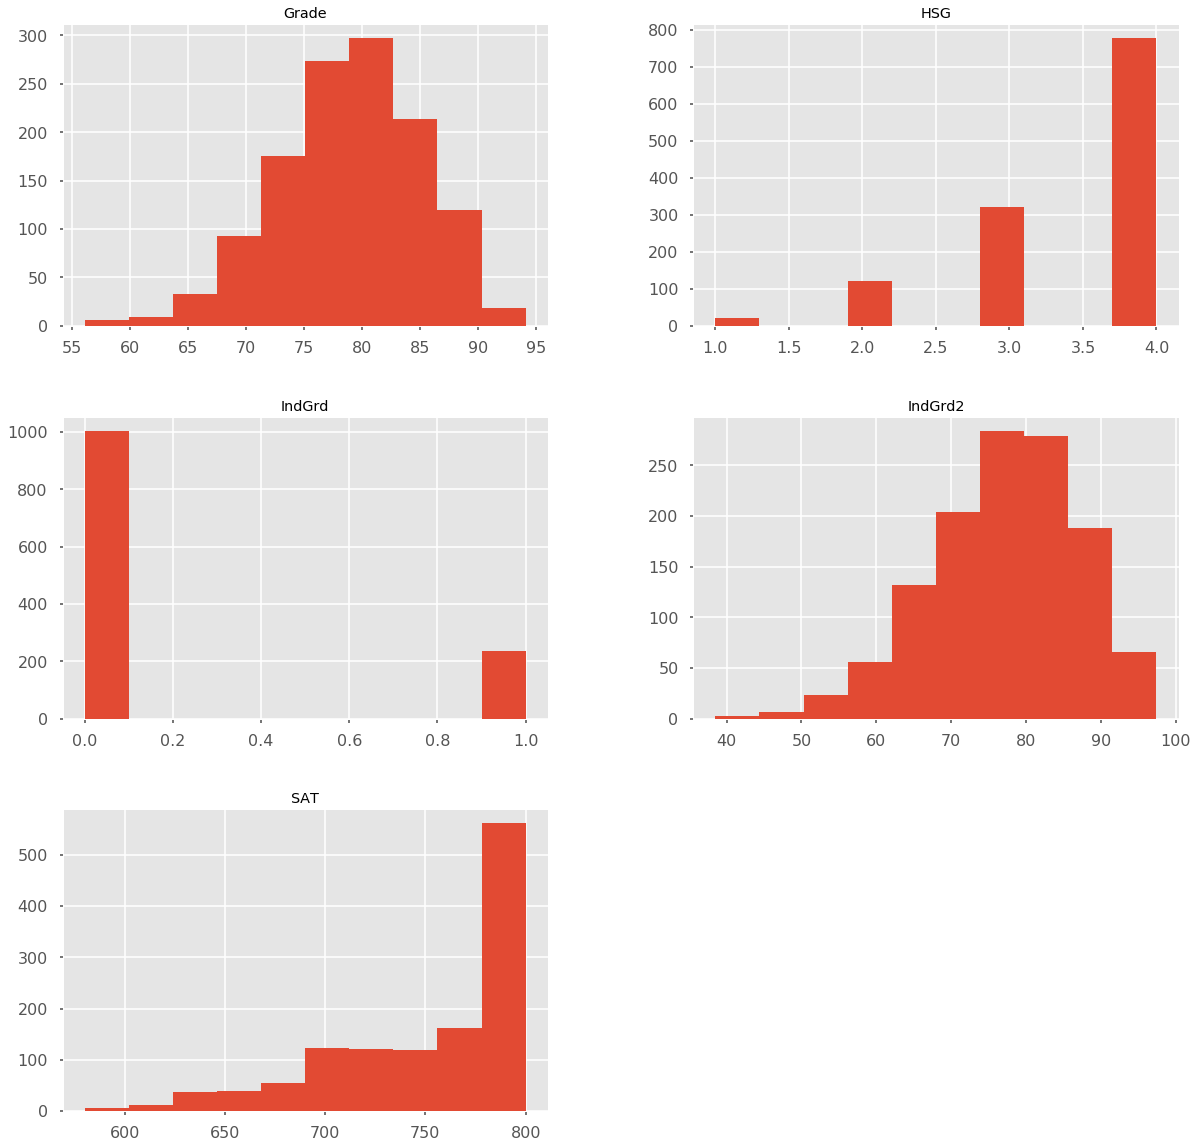

In [7]:
df.hist(figsize = (20,20))
plt.show()

In [8]:
df.corr()

,Grade,HSG,IndGrd2,SAT,IndGrd
Grade,1.000000,0.247350,0.877206,0.357560,0.591509
HSG,0.247350,1.000000,0.352168,0.241063,0.211673
IndGrd2,0.877206,0.352168,1.000000,0.444306,0.637264
SAT,0.357560,0.241063,0.444306,1.000000,0.292428
IndGrd,0.591509,0.211673,0.637264,0.292428,1.000000


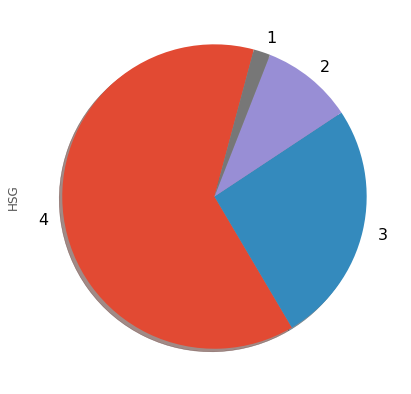

In [9]:
plt.figure(figsize=(7,7))
df.HSG.value_counts().plot.pie(shadow = True, startangle = 75)

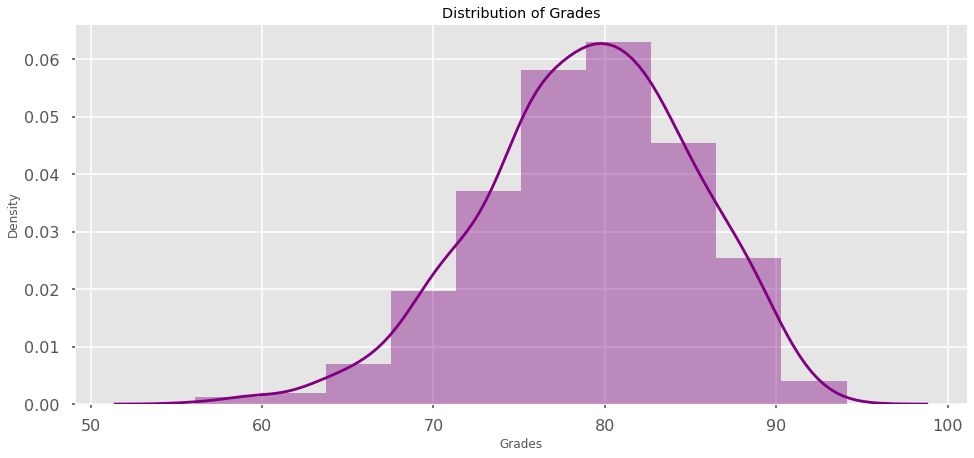

In [10]:
plt.figure(figsize=(16,7))
ax=sns.distplot(df['Grade'],bins=10,color='purple')
ax.set(xlabel='Grades', ylabel='Density',title='Distribution of Grades')
plt.show()

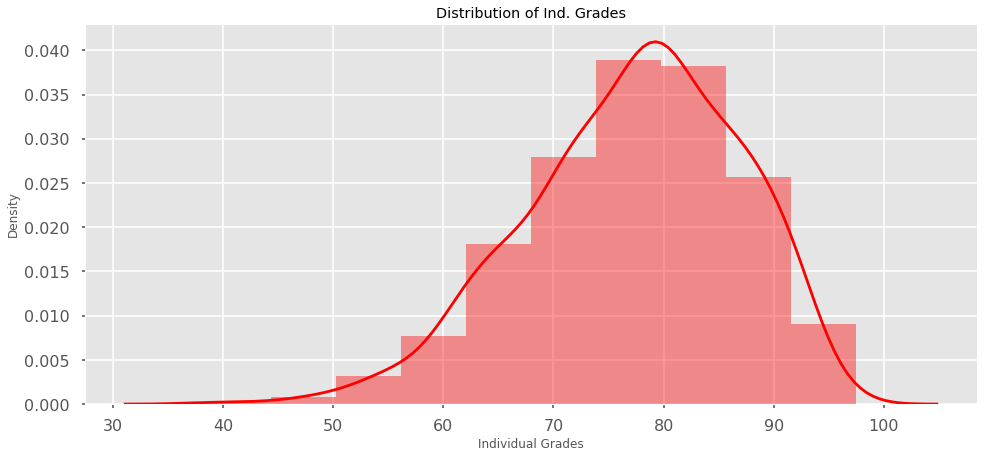

In [11]:
plt.figure(figsize=(16,7))
ax=sns.distplot(df['IndGrd2'],bins=10,color='red')
ax.set(xlabel='Individual Grades', ylabel='Density',title='Distribution of Ind. Grades')
plt.show()

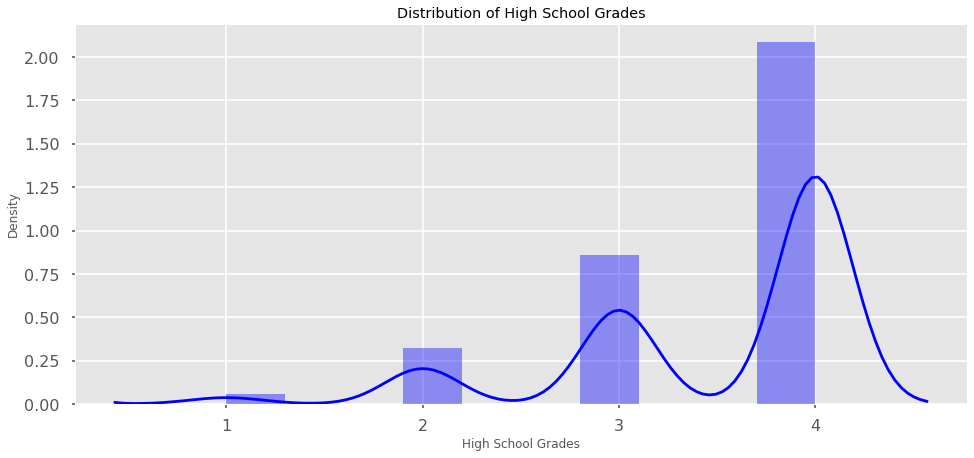

In [15]:
plt.figure(figsize=(16,7))
ax=sns.distplot(df['HSG'],bins=10,color='blue')
ax.set(xlabel='High School Grades', ylabel='Density',title='Distribution of High School Grades')
plt.show()

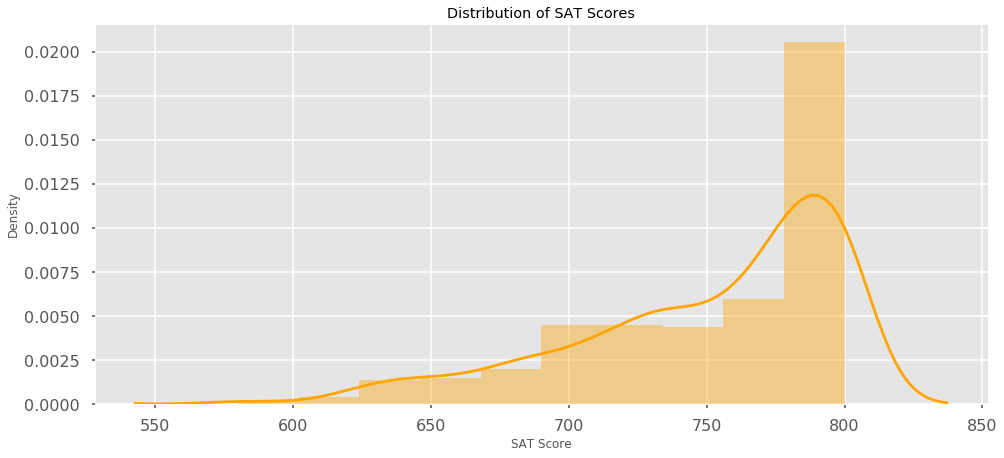

In [16]:
plt.figure(figsize=(16,7))
ax=sns.distplot(df['SAT'],bins=10,color='orange')
ax.set(xlabel='SAT Score', ylabel='Density',title='Distribution of SAT Scores')
plt.show()

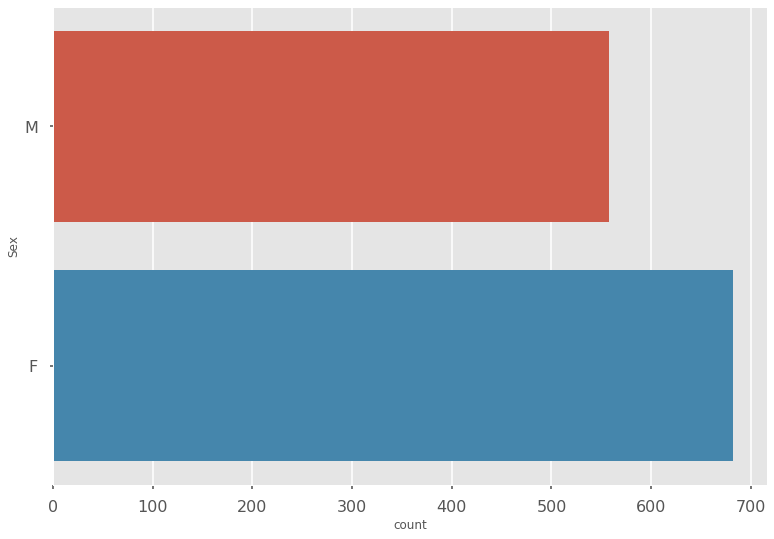

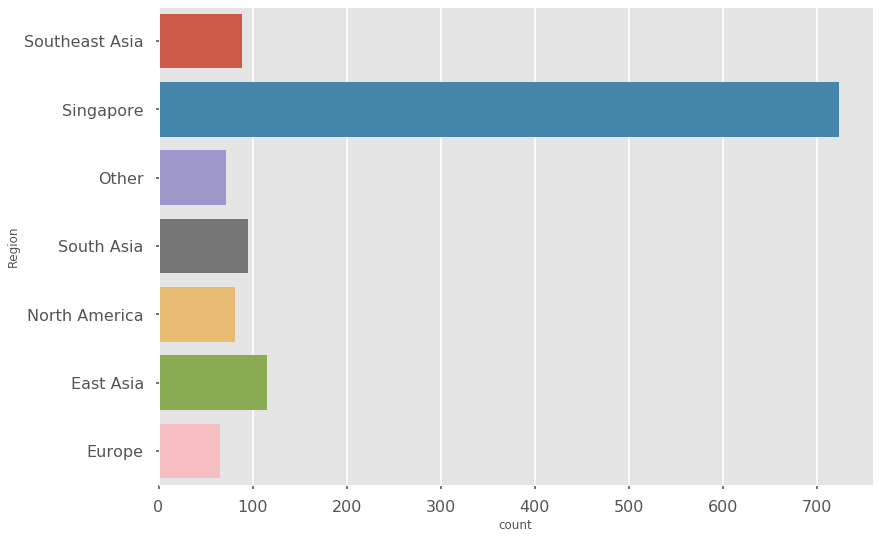

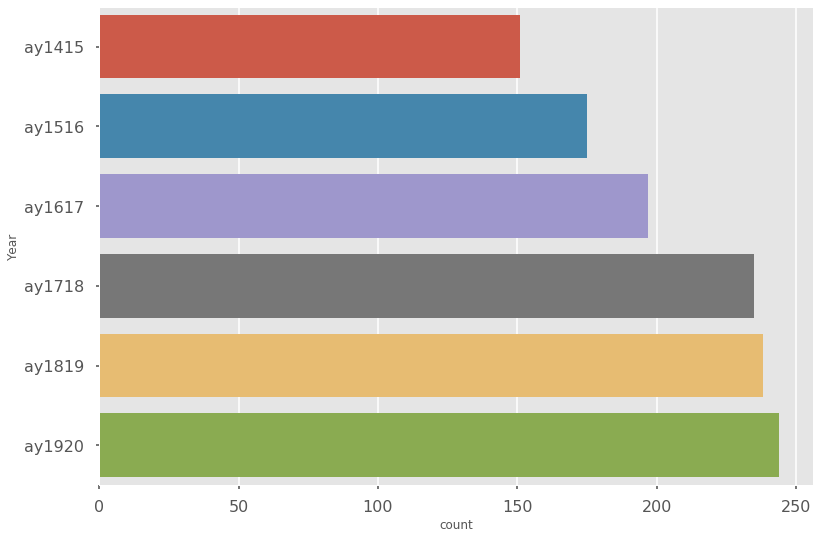

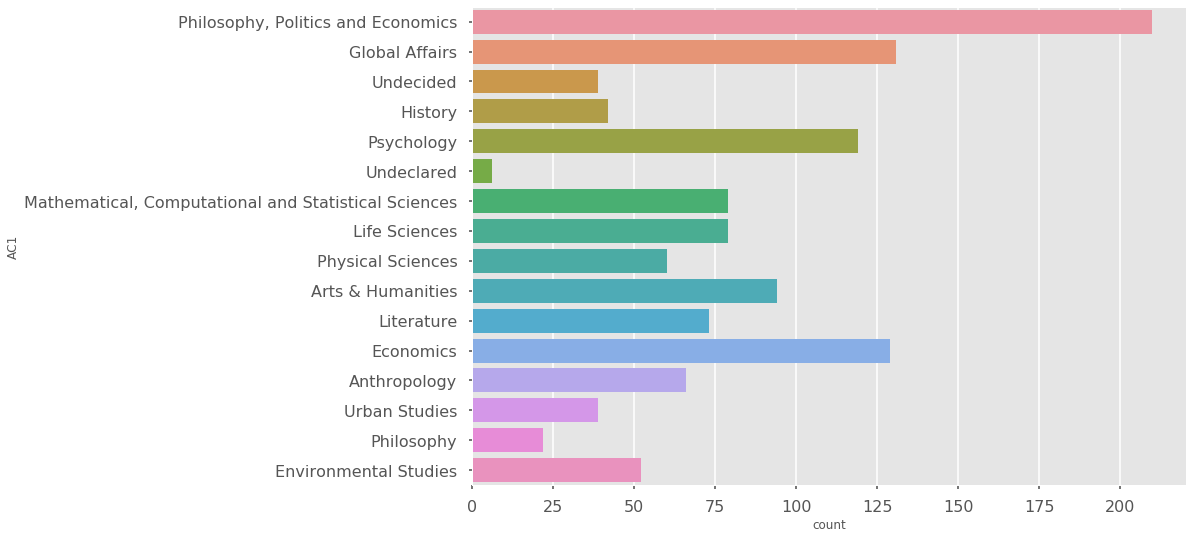

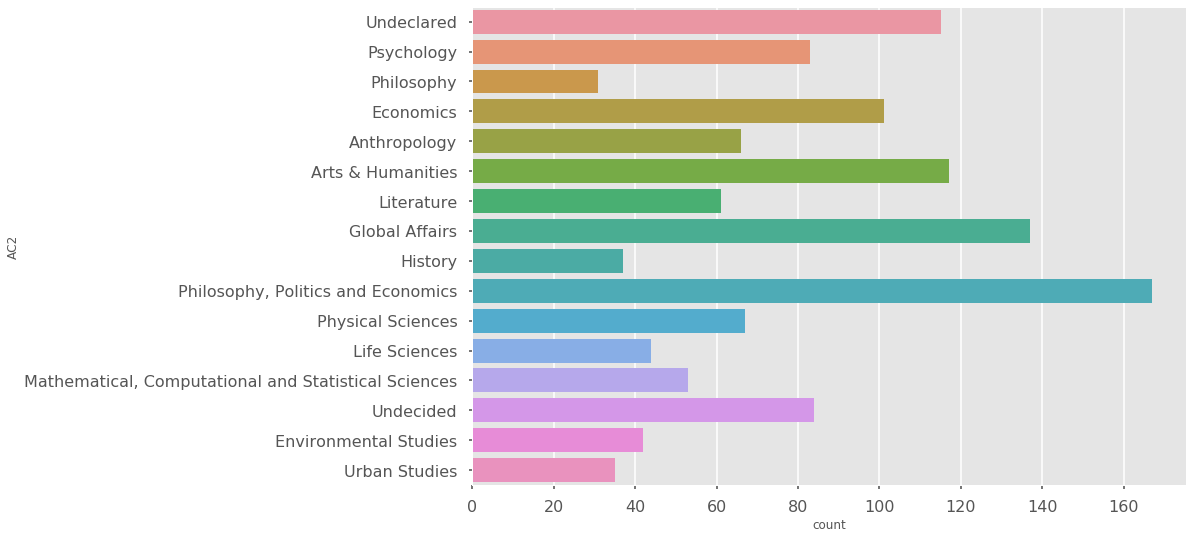

In [17]:
for column in df.select_dtypes(include=[ "object"]):
    if df[column].nunique() < 50:
        sns.countplot(y=column, data=df)
        plt.show()

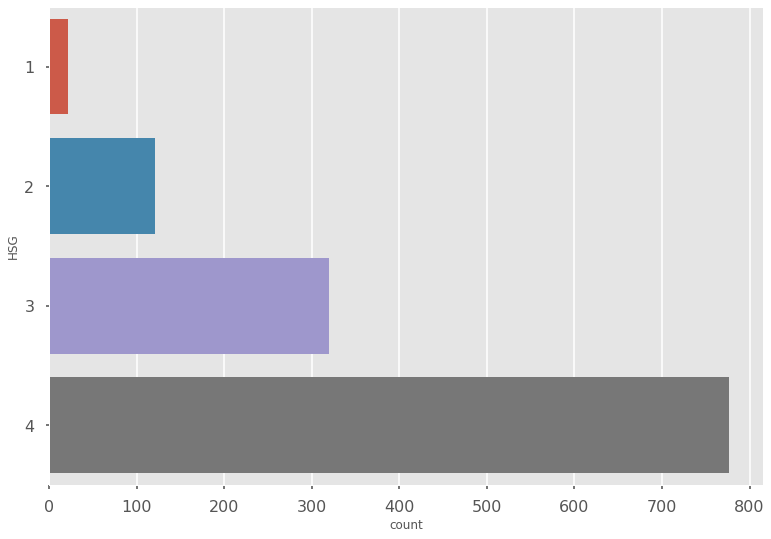

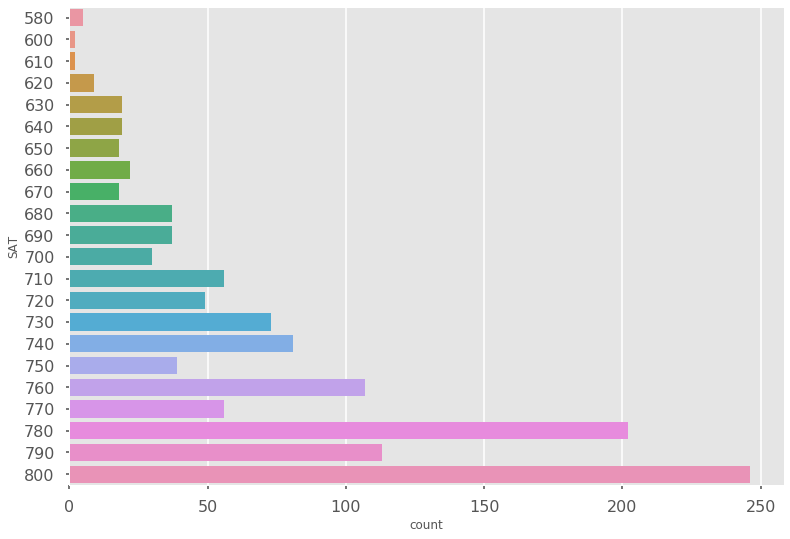

In [18]:
for column in df.select_dtypes(include=["int64"]):
    if df[column].nunique() < 50:
        sns.countplot(y=column, data=df)
        plt.show()

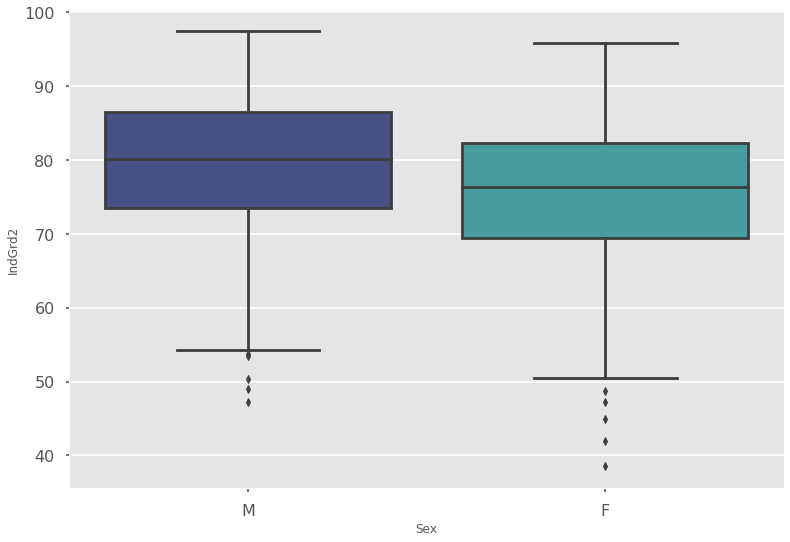

In [19]:
sns.boxplot( y=df["IndGrd2"], x=df["Sex"],palette='mako');
plt.show()

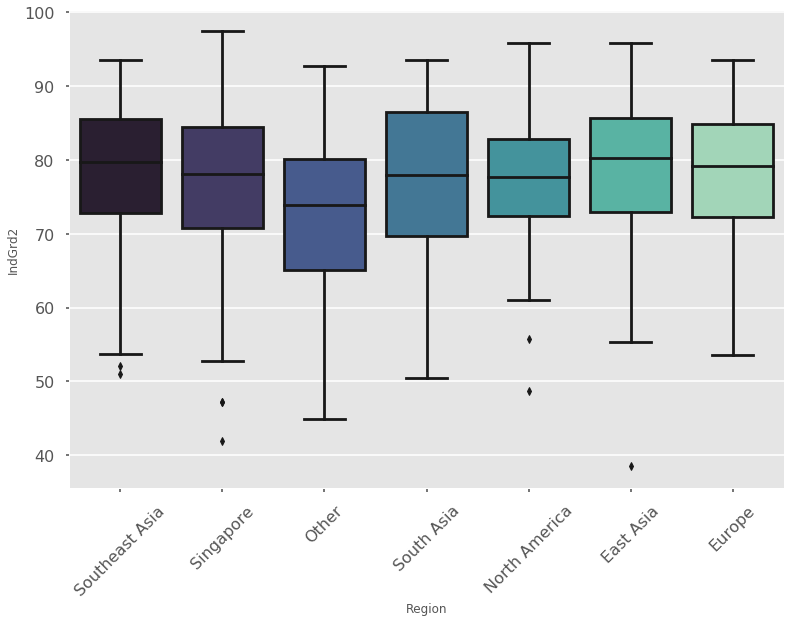

In [20]:
a=sns.boxplot( y=df["IndGrd2"], x=df["Region"],palette='mako')
plt.xticks(rotation=45)
plt.show()

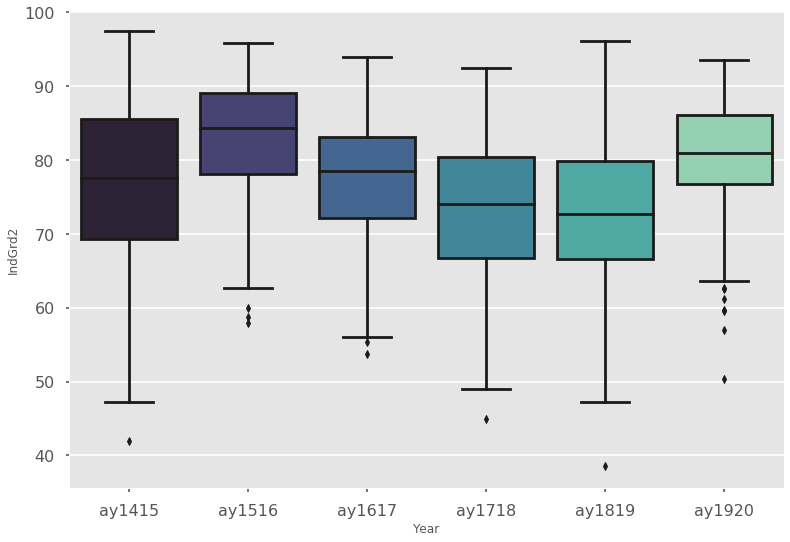

In [21]:
a= sns.boxplot( y=df["IndGrd2"], x=df["Year"],palette='mako')
plt.show()

# Feature Engineering  
Now, we have a mix of categorical, numerical, and continuous data in the dataset. Some columns are categorical variables with two levels (e.g Sex), so we transform them into binary variables using the map function. Here, 1 represents a Yes, and a 0 represents No. The updated dataframe can be seen below. 

For a lot of other variables, they take other values which are not yes and no. Therefore, using the industry standards, we use One-Hot-Encoding is used. We select some categorical, but not ordinal features he following features are categoricalwhich have more than 2 values, and transform them into dummy variables using the `get_dummies` function from pandas. take on more than 2 values. 

In [4]:
df = df.drop(['Year','PIN','Grade','IndGrd2'], axis=1)
df = pd.get_dummies(df, columns=['Sex','Region','AC1','AC2'])
df

,HSG,SAT,IndGrd,Sex_F,Sex_M,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,...,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Undeclared,AC2_Urban Studies
0,3,770,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,680,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4,730,0.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,790,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3,800,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3,770,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1236,4,750,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1237,4,780,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1238,3,800,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.to_csv('QRdummydata.csv') #Exporting the dataset with dummy variables.